In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys
import argparse

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext
from al.agent_rl import PolicyGradientREINFORCE, PolicyGradientActorCritic, UniformRandom
from al.env_al import normal_iid, uniform_iid, sinewave, linear_classifier
from al.policy import PolicyNN, PolicyNNActorCritic

sys.path.append(os.getcwd())

In [41]:
##############################################################################
# Running a single experiment

# true_theta = [1.0, 0.5]
unit_circle_angle = np.random.uniform(0, 2*np.pi) # sample 100-dim theta with first two non-zero and l2-norm theta=1
true_theta = [np.cos(unit_circle_angle), np.sin(unit_circle_angle)] + [0]*98
n_steps = 1000
seed = 0
args = argparse.Namespace() # From https://stackoverflow.com/questions/16878315/what-is-the-right-way-to-treat-python-argparse-namespace-as-a-dictionary
args.n_feat = len(true_theta)
args.optim = 'sgd' #'adam'
args.learn_rate = 1e-3
args.momentum = 0.9 # only for SGD
args.gamma = 1 # discount factor
args.sample_cost = 1 # 0 <= cost
args.in_dim = 100 # input dim of policy
args.n_act = 2 # num actions

agent = PolicyGradientActorCritic(PolicyNNActorCritic, args) #UniformRandom(n_arm)
# env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
env = ContextualBanditFunctionalContext(uniform_iid, true_theta, linear_classifier)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

pick_action [-0.14787124 -0.36456995]
pick_action [-0.19943988 -0.82627496]
pick_action [-0.28773816 -0.94416251]
pick_action [-0.0215374  -1.20200549]
pick_action [-0.1119079  -0.97871652]
pick_action [ 0.05387312 -1.11077982]
pick_action [ 0.12223963 -1.15600865]
pick_action [-0.11948881 -1.24204429]
pick_action [-0.08712464 -1.17180999]
pick_action [-0.07205013 -1.07691243]


224 0.224


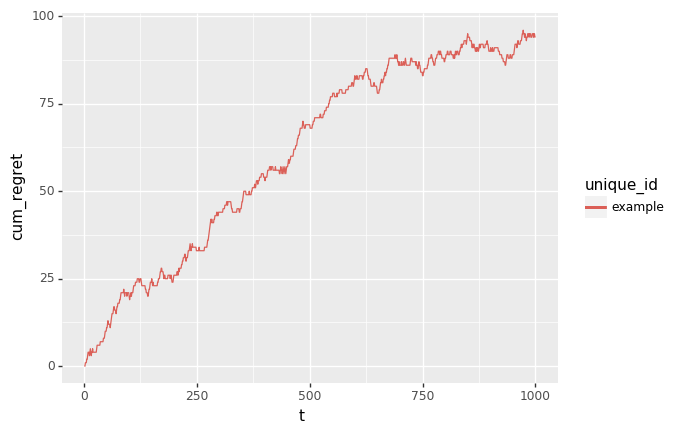

<ggplot: (7563830455)>


In [42]:
##############################################################################
# Simple display / plot of results

print(env.num_query, env.num_query/n_steps)

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

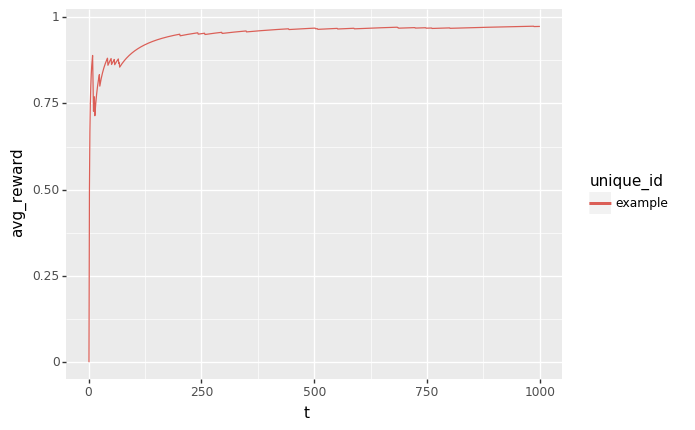

<ggplot: (-9223372029292517330)>
69 0.069


In [19]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='avg_reward', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [18]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,instant_reward,cum_reward,avg_reward,num_query,logger
0,1,1.0,1.0,"(1, 0.0)",example,0.0,0.0,0.000000,1,"[0.0, 0.0]"
1,2,0.0,1.0,"(1, -1.0)",example,1.0,1.0,0.500000,2,"[0.1708161200942459, 0.03874788745202391]"
2,3,0.0,1.0,"(1, 1.0)",example,1.0,2.0,0.666667,3,"[0.37070075736057584, -0.08313072792833524]"
3,4,0.0,1.0,"(0, 1.0)",example,1.0,3.0,0.750000,3,"[0.4542851104705071, -0.09541485364835722]"
4,5,0.0,1.0,"(0, 1.0)",example,1.0,4.0,0.800000,3,"[0.4542851104705071, -0.09541485364835722]"
...,...,...,...,...,...,...,...,...,...,...
995,996,0.0,27.0,"(0, -1.0)",example,1.0,969.0,0.972892,69,"[2.8052311175816977, 1.47682807970531]"
996,997,0.0,27.0,"(0, -1.0)",example,1.0,970.0,0.972919,69,"[2.8052311175816977, 1.47682807970531]"
997,998,0.0,27.0,"(0, 1.0)",example,1.0,971.0,0.972946,69,"[2.8052311175816977, 1.47682807970531]"
998,999,0.0,27.0,"(0, -1.0)",example,1.0,972.0,0.972973,69,"[2.8052311175816977, 1.47682807970531]"


In [12]:
agent.w_t

array([1.88939474, 0.84184241])

In [13]:
list(agent.policy.parameters())

[Parameter containing:
 tensor([[-0.2787, -0.5066],
         [ 0.5832,  0.5290]], requires_grad=True), Parameter containing:
 tensor([-0.1500, -0.5051], requires_grad=True), Parameter containing:
 tensor([[ 0.3234, -0.3129],
         [-0.0861, -0.5558]], requires_grad=True), Parameter containing:
 tensor([ 3.3597, -3.1324], requires_grad=True), Parameter containing:
 tensor([[-0.3166,  0.4822]], requires_grad=True), Parameter containing:
 tensor([8.3231e-07], requires_grad=True)]

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)

In [77]:
np.append(np.array([1,2]),23)

array([ 1,  2, 23])